<h1>Loading Dependencies and Data  필요한 것들 로드</h1>

In [5]:
#각종 라이브러리들
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.datasets import load_breast_cancer # Sklearn 라이브러리에서 전체 데이터셋 로드s

# 유방암 데이터 셋
cancer = load_breast_cancer()
(X_canc, y_canc) = load_breast_cancer(return_X_y = True)  # X_canc와 y_canc에 데이터와 레이블 할당

<h1>레이블이 지정된 산점도를 그리는 함수</h1>

In [4]:
def plot_labelled_scatter(X, y, class_labels, s):
    num_labels = len(class_labels)  # 레이블의 수

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']  # 마커 형태
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']  # 색상 배열
    cmap_bold = ListedColormap(color_array)  # 색상 맵 설정
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)  # 경계 정규화
    plt.figure(figsize=s)  # 그림 크기 설정
    
    # 산점도 그리기
    plt.scatter(X[:, 0], X[:, 1], s=80, c=y, cmap=cmap_bold, norm=bnorm, alpha=0.4, edgecolor='black', lw=1)
    sp = plt.gca().spines
    sp['top'].set_visible(False)  # 상단 테두리 숨기기
    sp['right'].set_visible(False)  # 우측 테두리 숨기기
    
    plt.grid(which='both', color='lightslategrey', alpha=0.3)  # 그리드 설정

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))  # 범례 항목 생성
    plt.legend(handles=h, fontsize=15, frameon=False)  # 범례 추가



<h1>차원축소</h1>

- ex) 200개 피처를 가진 원본 데이터 셋 -> 10개의 피처
- 데이터셋을 처음 탐색할 때 자주 필요함
- 어떻게 그룹화 되어있는지, 서로 어떤 관련이 있는지 이해하기 위해 **2차원 산점도** 로 시각화 -> 차원축소 필요

<h1>차원축소 알고리즘/메소드</h1>

1. PCA
2. MDS
3. t-SNE

<h2>PCA</h2>

- 변동성을 가장 많이 띠는 차원(중요한 차원임!)을 제외하고 모든 차원을 제거
- 가장 큰 데이터 변동성을 기반으로 첫번째 벡터 축 생성
- 두 번째 벡터축은 첫 번째 벡터축에 직각
- 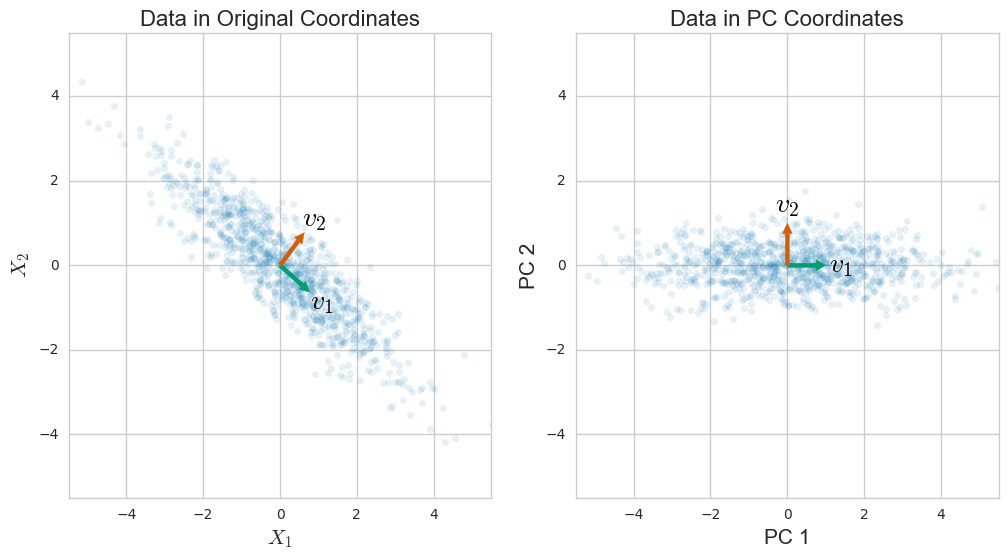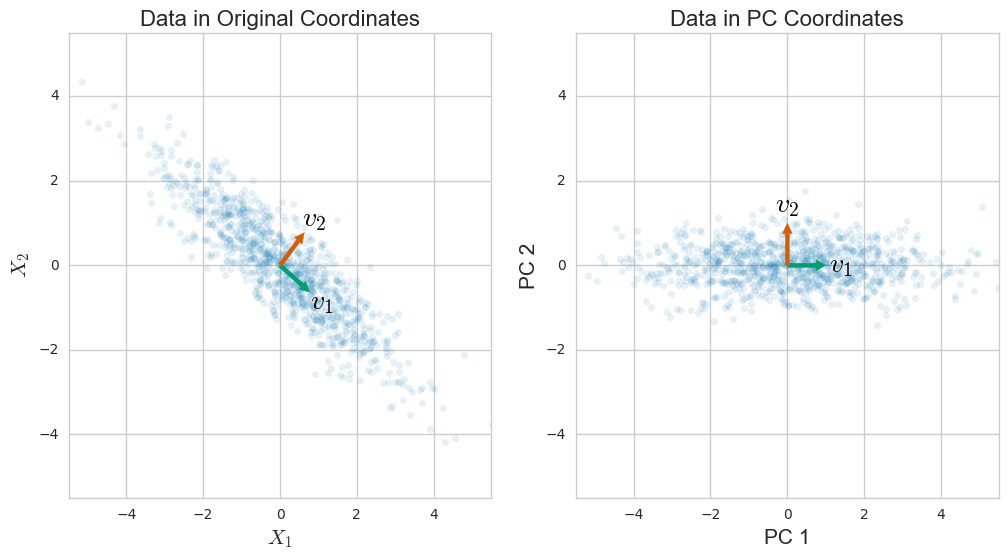

<h1>Using PCA to find the first two Principal Components of the Breast Cancer Dataset
</h1>

유방암 데이터셋의 첫 두 주성분을 찾기 위해 PCA 사용하기

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# PCA를 적용하기 전에, 각 특성은 중심이 0이고 단위 분산을 가져야 합니다.
# 이는 sklearn 라이브러리의 StandardScaler를 사용하여 수행할 수 있습니다.
canc_norm = StandardScaler().fit(X_canc).transform(X_canc)  

pca = PCA(n_components = 2).fit(canc_norm) # 2개의 주성분으로 PCA 적합

canc_pca = pca.transform(canc_norm)  # PCA 변환 수행

print('Number of Features in Breat Cancer DataSet Before PCA : {}\n\nNumber of Features in Breast Cancer DataSet After PCA : {}'
      .format(X_canc.shape[1],canc_pca.shape[1]))

Number of Features in Breat Cancer DataSet Before PCA : 30

Number of Features in Breast Cancer DataSet After PCA : 2


**2개로 줄었으니 시각화하기 쉬워짐**

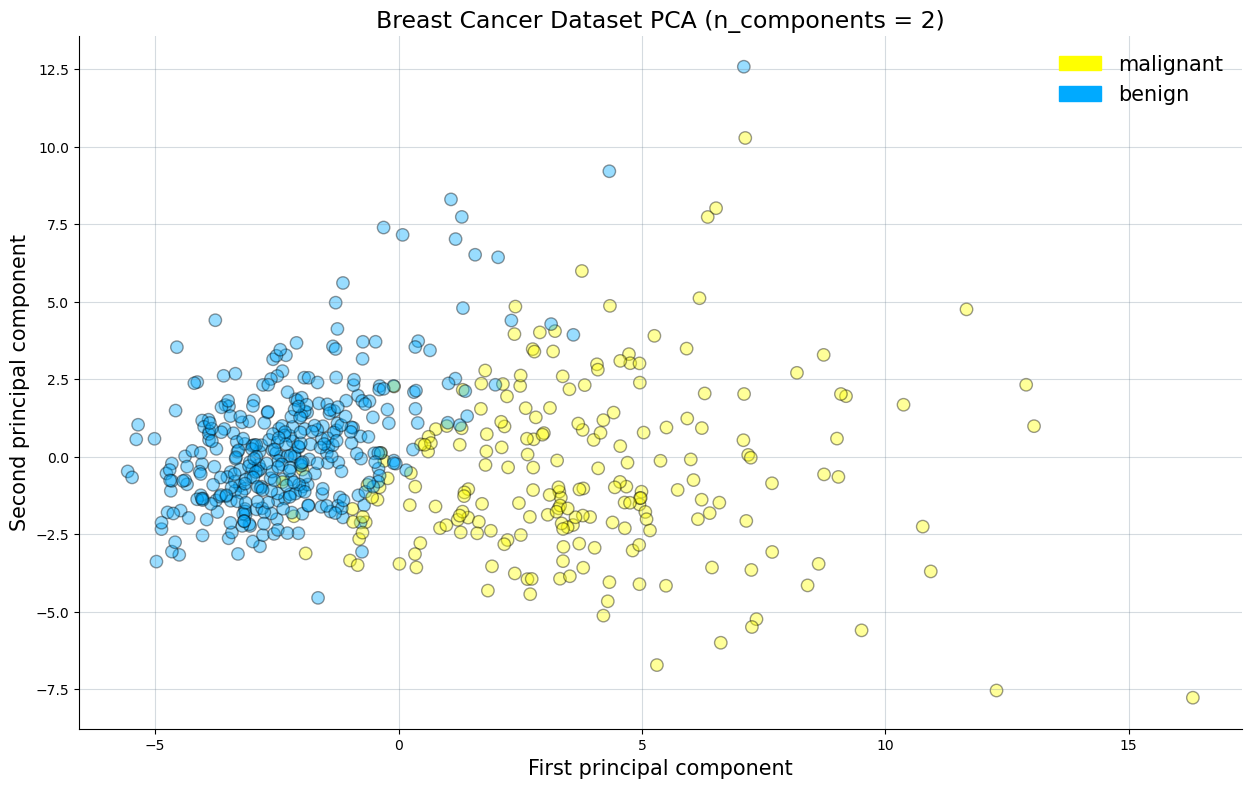

In [7]:
plot_labelled_scatter(canc_pca, y_canc, ['malignant', 'benign'],(15,9)) #Using the Helper Function

#Labelling
plt.xlabel('First principal component',fontsize=15)
plt.ylabel('Second principal component',fontsize=15)
plt.title('Breast Cancer Dataset PCA (n_components = 2)',fontsize=17);

<h1>Using PCA to get feature Co-Relation Between the Initial 30 Features</h1>

PCA를 사용하여 초기 30개 특성 간의 상관 관계 얻기
PCA는 '.components_'라는 속성을 제공하는데, 이는 PCA 객체의 적합 과정 중에 생성된 높고 낮은 분산을 가진 특성 쌍 간의 상관 관계를 저장합니다. 이 상관 관계 값들은 히트맵을 사용하여 활용하고 시각화할 수 있습니다.

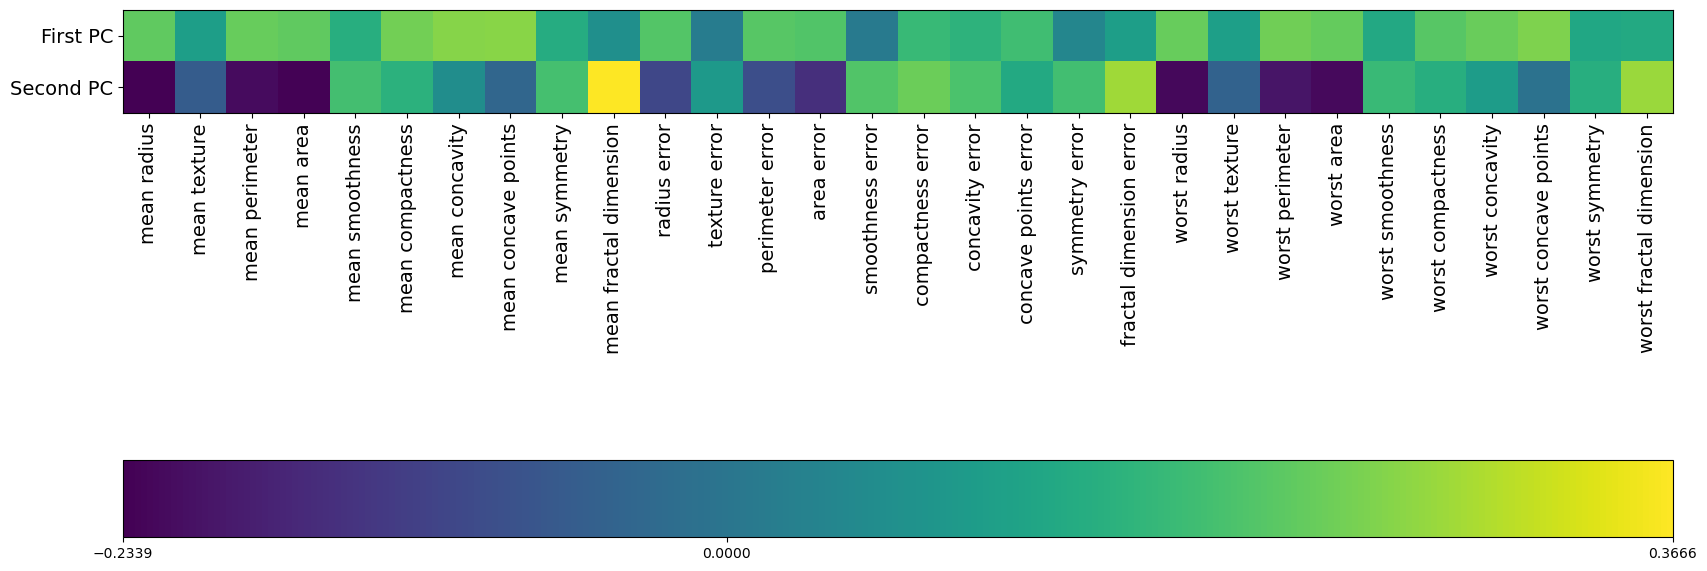

In [8]:
fig = plt.figure(figsize=(20,9))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'viridis')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(len(feature_names)));
plt.gca().set_yticks(np.arange(2));
plt.gca().set_xticklabels(feature_names, rotation=90, fontsize=14);
plt.gca().set_yticklabels(['First PC', 'Second PC'], fontsize=14);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.5);

<h3>1. 첫 번째 주성분 (PC1)</h3>

- 모든 30개 특성이 일반적으로 양의 상관 관계를 가짐.
- 특성들이 함께 상하로 변동하는 경향이 있음.

<h3>두 번째 주성분 (PC2)</h3>

- 양수와 음수가 혼합된 특성들을 포함.
- 특정 특성 군집이 나머지 특성들과 반대 방향으로 함께 변동.
- 예: '평균 질감(mean texture)'과 '최악의 질감(worst texture)', '평균 반경(mean radius)'과 '최악의 반경(worst radius)' 등이 함께 변동.

<h1>PCA에 대한 평가</h1>
PCA는 데이터셋을 탐색하는데 좋은 초기 도구를 제공합니다. 이 방법은 빠르며 거의 모든 유형의 데이터셋에 적용할 수 있지만, 더 복잡한 데이터셋의 경우 더 나은 시각화를 제공하는 더 미묘한 그룹화를 찾아내는 데는 한계가 있을 수 있습니다.

<h1>2. MDS</h1>

1. 매니폴드 학습 알고리즘

- 고차원 데이터에서 저차원 구조를 찾는 데 특화된 비지도 학습 알고리즘 그룹.
- 데이터의 복잡한 구조와 패턴을 효과적으로 시각화할 수 있게 도움.


2. 스위스 롤 데이터셋 예시

- 점들이 흥미로운 형태의 두 차원 시트 위에 위치한 고차원 데이터셋.
- 저차원의 '매니폴드'로, 고차원 공간 내에서 저차원적 특성을 지님.


3. PCA와의 비교

- PCA는 선형적 관계와 구조만을 포착하여, 복잡한 비선형 구조를 찾는 데는 한계가 있음.
- MDS와 같은 매니폴드 학습 방법은 비선형 구조와 관계도 포착 가능.

4. MDS의 용도

- 복잡한 고차원 데이터에서 중요한 저차원 정보를 추출하고 시각화.
- 데이터 간의 유사성이나 거리를 기반으로 저차원 공간에서의 구조를 탐색.

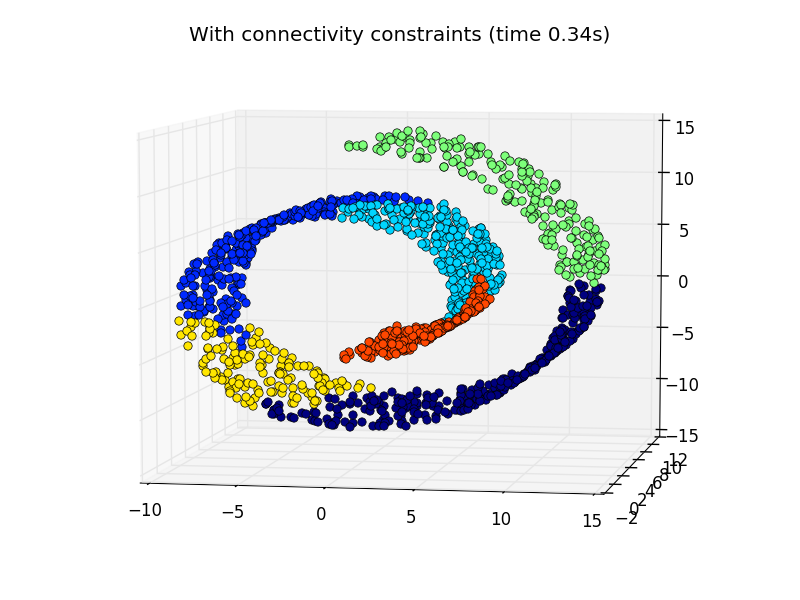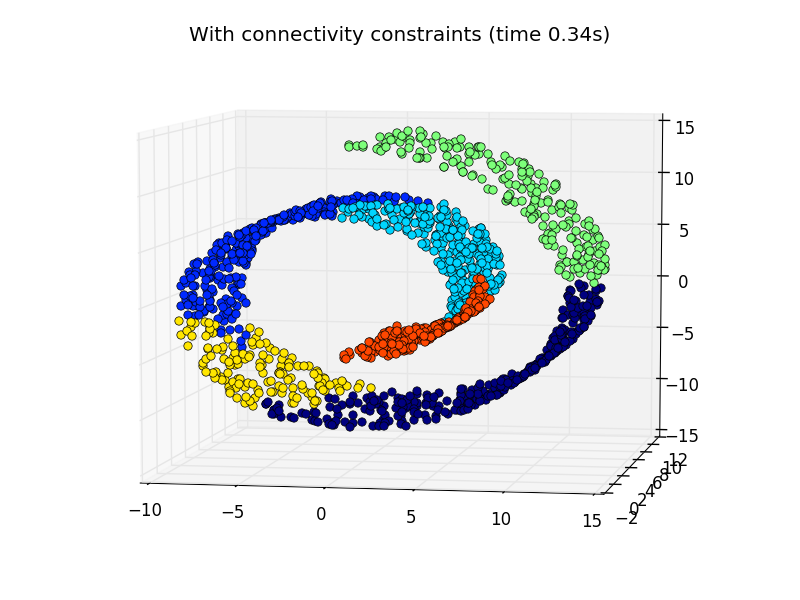






<h1> MDS의 유형 요약 </h1>

1. 목적: 모든 MDS의 주요 목적은 고차원 데이터셋을 시각화하고 저차원 공간에 투영하는 것입니다.

2. 정보 보존: 고차원 공간에서 데이터 포인트들 사이의 근접성에 관한 정보를 보존하면서 주로 두 차원의 페이지에 데이터를 투영합니다.
   
3. 응용: 이 과정을 통해 사용자는 고차원 데이터 내에서 군집화 경향을 찾아내고 시각화할 수 있습니다.

<h1>Using MDS on the Breast Cancer Dataset :</h1>

C:\Users\cse_123\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Number of Features in Breat Cancer DataSet Before MDS : 30

Number of Features in Breast Cancer DataSet After MDS : 2


Text(0.5, 1.0, 'Breast Cancer Dataset MDS (n_components = 2)')

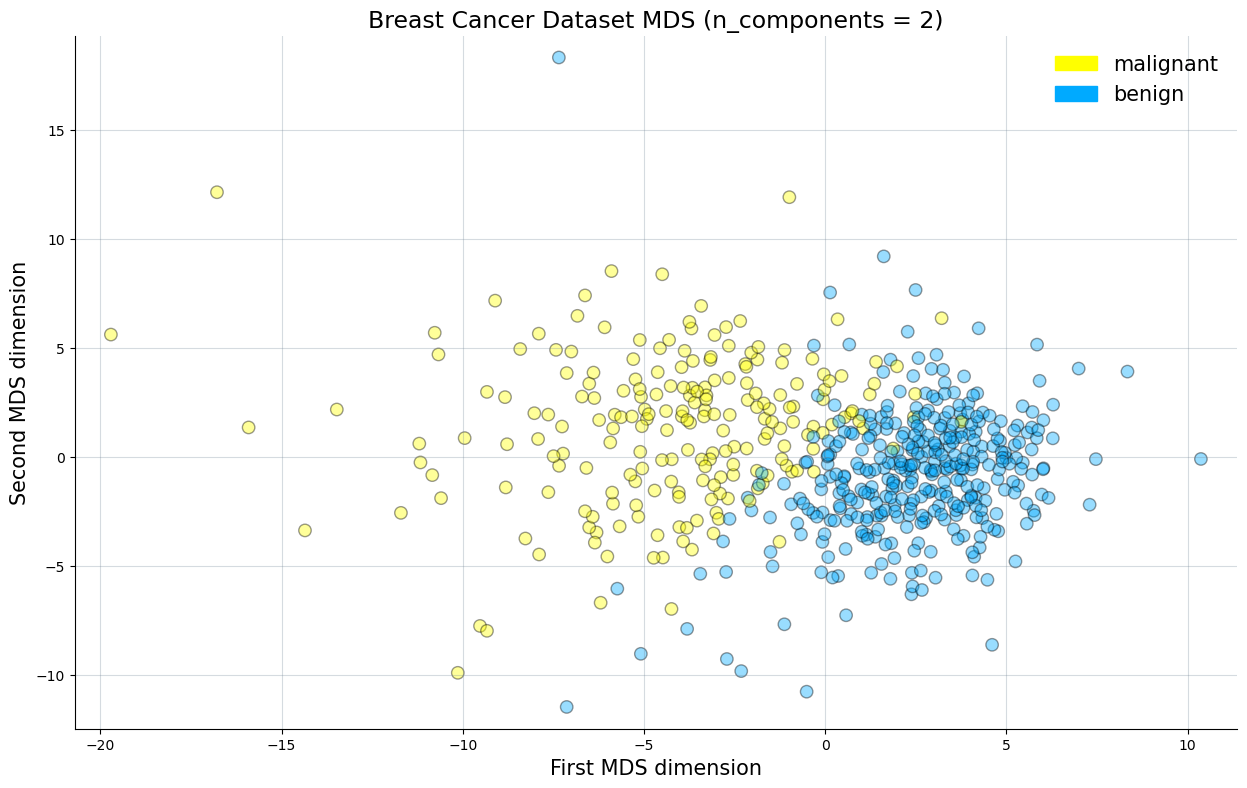

In [11]:
from sklearn.manifold import MDS

mds = MDS(n_components = 2,random_state = 2)

canc_mds = mds.fit_transform(canc_norm)

print('Number of Features in Breat Cancer DataSet Before MDS : {}\n\nNumber of Features in Breast Cancer DataSet After MDS : {}'
      .format(X_canc.shape[1],canc_mds.shape[1]))

plot_labelled_scatter(canc_mds, y_canc, ['malignant', 'benign'],(15,9))

plt.xlabel('First MDS dimension',fontsize=15)
plt.ylabel('Second MDS dimension',fontsize=15)
plt.title('Breast Cancer Dataset MDS (n_components = 2)',fontsize=17)

<h1>Remarks on MDS</h1>
You can see, That MDS did a similar job to PCA but there is a diffrence between MDS and PCA distribution and that is because both algorithms works on different principles and uses different mathematical models.

<h1>3. T-distributed Stochastic Neighbor Embedding (t-SNE</h1>

1. **알고리즘 소개**: t-SNE는 데이터를 시각화하기 위해 특히 강력한 매니폴드 학습 알고리즘임.
2. **작동 원리**: 이 알고리즘은 데이터의 2차원 표현을 찾아내며, 2D 산점도 상의 점들 간의 거리가 원래 고차원 데이터셋의 동일한 점들 간의 거리와 최대한 일치하도록 함.
3. **특징적 접근**: t-SNE는 이웃한 점들 간의 거리 정보를 보존하는 데 특히 더 많은 가중치를 둠. 이로 인해 국지적인 데이터 구조를 더 잘 포착할 수 있음.

   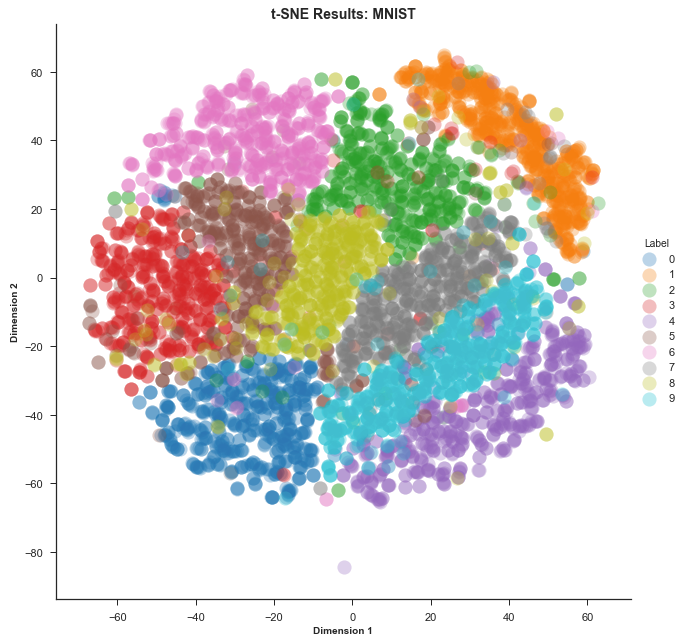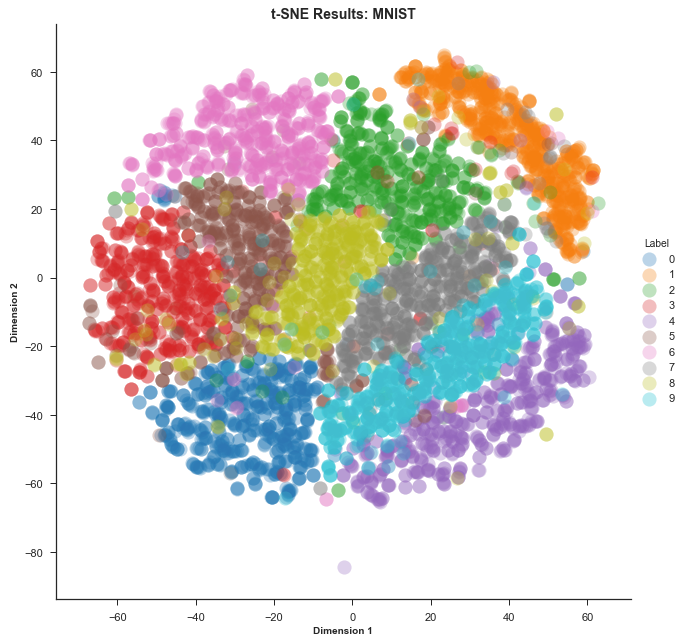

<h1>Using T-SNE on the Breast Cancer Dataset</h1>

Number of Features in Breat Cancer DataSet Before T-SNE : 30

Number of Features in Breast Cancer DataSet After T-SNE : 2


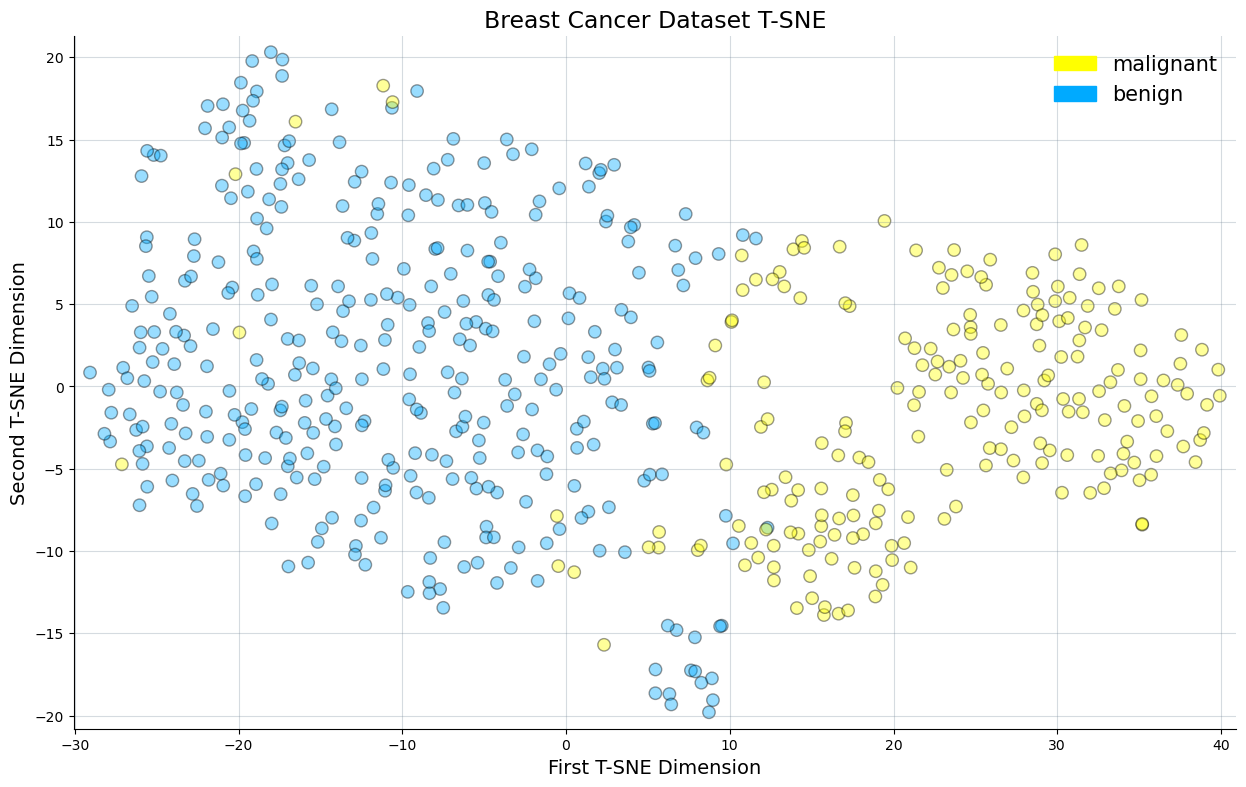

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 42)

canc_tsne = tsne.fit_transform(canc_norm)

print('Number of Features in Breat Cancer DataSet Before T-SNE : {}\n\nNumber of Features in Breast Cancer DataSet After T-SNE : {}'
      .format(X_canc.shape[1],canc_tsne.shape[1]))

plot_labelled_scatter(canc_tsne, y_canc, ['malignant', 'benign'],(15,9))

plt.xlabel('First T-SNE Dimension',fontsize=14)
plt.ylabel('Second T-SNE Dimension',fontsize=14)
plt.title('Breast Cancer Dataset T-SNE',fontsize=17);

<h1>Remarks on T-SNE :</h1>

1. **성과**: T-SNE는 유방암 데이터셋에서 구조를 찾는 데 상당히 좋은 성과를 보여줌
2. **다양성의 중요성**: 이는 우리에게 매니폴드 학습을 사용하여 데이터를 시각화할 때, 특정 데이터셋에 가장 잘 맞는 방법을 찾기 위해 몇 가지 다른 접근 방법을 시도해야 한다는 것을 상기시켜줌
3. **적합한 데이터셋**: T-SNE는 지역적 구조가 더 잘 정의된 데이터셋, 즉 이웃의 패턴이 더 명확하게 정의된 데이터셋에서 더 잘 작동하는 경향이 있음.